In [33]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/workshop.css", "r").read()
    return HTML(styles)
css_styling()

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob

<div class="alert alert-warning">
<h2>Goals</h2>
</div>

* Define a function that takes parameters.
* Return a value from a function.
* Test and debug a function.
* Set default values for function parameters.
* Explain why we should divide programs into small, single-purpose functions.

At this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetative, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ - a shorthand way of re-executing longer pieces of code.

Let’s start by defining a function fahr_to_kelvin that converts temperatures from Fahrenheit to Kelvin:

In [35]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

The function definition opens with the word def, which is followed by the name of the function and a parenthesized list of parameter names. The body of the function — the statements that are executed when it runs — is indented below the definition line, typically by four spaces.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function. Calling our own function is no different from calling any other function:

In [36]:
print 'freezing point of water:', fahr_to_kelvin(32)
print 'boiling point of water:', fahr_to_kelvin(212)

freezing point of water: 273.15
boiling point of water: 273.15


We’ve successfully called the function that we defined, and we have access to the value that we returned. Unfortunately, the value returned doesn’t look right. What went wrong?

#### Debugging

Debugging is when we fix a piece of code that we know is working incorrectly. In this case, we know that ```fahr_to_kelvin``` is giving us the wrong answer, so let’s find out why.

For big pieces of code, there are tools called debuggers that aid in this process. Since we just have a short function, we’ll debug by choosing some parameter value, breaking our function into small parts, and printing out the value of each part.

In [37]:
# We'll use temp = 212, the boiling point of water, which was incorrect
print "212 - 32:", 212 - 32

212 - 32: 180


In [38]:
print "(212 - 32) * (5/9):", (212 - 32) * (5/9)

(212 - 32) * (5/9): 0


Aha! The problem comes when we multiply by ```5/9```. This is because ```5/9``` is actually 0.

Computers store numbers in one of two ways: as integers or as floating-point numbers (or floats). The first are the numbers we usually count with; the second have fractional parts. Addition, subtraction and multiplication work on both as we’d expect, but division works differently. If we divide one integer by another, we get the quotient without the remainder:

In [39]:
print '10/3 is:', 10/3

10/3 is: 3


If either part of the division is a float, on the other hand, the computer creates a floating-point answer:

In [40]:
print '10.0/3 is:', 10.0/3

10.0/3 is: 3.33333333333


The computer does this for historical reasons: integer operations were much faster on early machines, and this behavior is actually useful in a lot of situations. It’s still confusing, though, so Python 3 produces a floating-point answer when dividing integers if it needs to. We’re still using Python 2.7 in this class, though, so if we want ```5/9``` to give us the right answer, we have to write it as ```5.0/9```, ```5/9.0```, or some other variation.

Another way to create a floating-point answer is to explicitly tell the computer that you desire one. This is achieved by casting one of the numbers:

 

In [41]:
print 'float(10)/3 is:', float(10)/3

float(10)/3 is: 3.33333333333


The advantage to this method is it can be used with existing variables. Let’s take a look:

In [42]:
a = 10
b = 3
print 'a/b is:', a/b
print 'float(a)/b is:', float(a)/b

a/b is: 3
float(a)/b is: 3.33333333333


Let’s fix our fahr_to_kelvin function with this new knowledge:

 

In [43]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5.0/9.0)) + 273.15

print 'freezing point of water:', fahr_to_kelvin(32)
print 'boiling point of water:', fahr_to_kelvin(212)
 

freezing point of water: 273.15
boiling point of water: 373.15


---

#### Exercise 1

Time to write a function of your own!  Keeping with the spirit of this section, write a function to convert one unit to another.  Google the conversation formula for the units of your choice (e.g. miles to kilometers) and write a write a function that returns the converted amount.

---

In [44]:
#Exercise 1
# Miles to kilometers

def convert(miles):
    return float(miles)/0.62137

print convert(10)

16.0934708789


#### Composing functions

Now that we’ve seen how to turn Fahrenheit into Kelvin, it’s easy to turn Kelvin into Celsius:

In [45]:
def kelvin_to_celsius(temp):
    return temp - 273.15

print 'absolute zero in Celsius:', kelvin_to_celsius(0.0)

absolute zero in Celsius: -273.15


What about converting Fahrenheit to Celsius? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [46]:
def fahr_to_celsius(temp):
    temp_k = fahr_to_kelvin(temp)
    result = kelvin_to_celsius(temp_k)
    return result

print 'freezing point of water in Celsius:', fahr_to_celsius(32.0)

freezing point of water in Celsius: 0.0


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-large chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

#### Tidying up

Now that we know how to wrap bits of code up in functions, we can make our inflammation analyasis easier to read and easier to reuse. First, let’s make an ```analyze``` function that generates our plots:

In [47]:
def analyze(filename):

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    plt.show(fig)

and another function called ```detect_problems``` that checks for those systematics we noticed:

In [48]:
def detect_problems(filename):

    data = np.loadtxt(fname=filename, delimiter=',')

    if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
        print 'Suspicious looking maxima!'
    elif data.min(axis=0).sum() == 0:
        print 'Minima add up to zero!'
    else:
        print 'Seems OK!'

Notice that rather than jumbling this code together in one giant ```for``` loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler ```for``` loop:



data/inflammation-01.csv


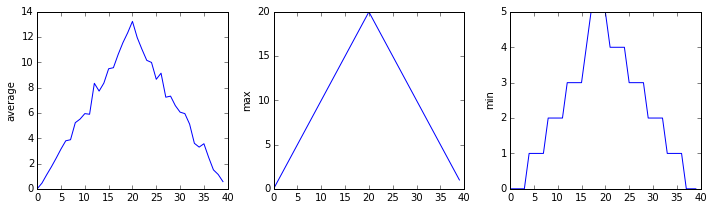

Suspicious looking maxima!
data/inflammation-02.csv


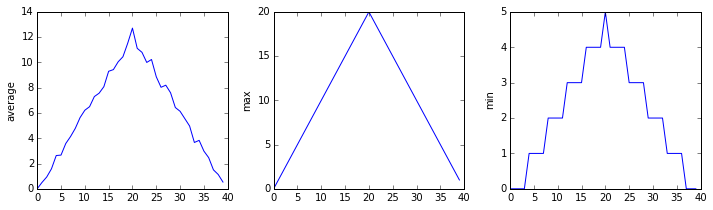

Suspicious looking maxima!
data/inflammation-03.csv


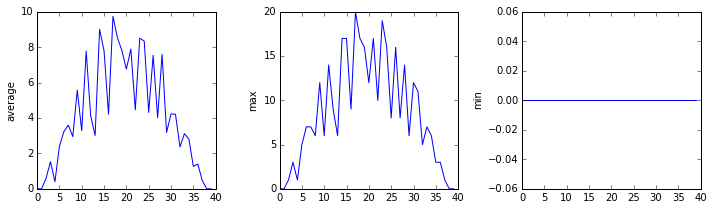

Minima add up to zero!


In [49]:
filenames = glob.glob("data/inflammation*.csv")

for f in filenames[:3]:
    print f
    analyze(f)
    detect_problems(f)

---

#### Exercise 2

Modify the ```analyze``` function above to plot the mean, the median, and the standard deviation.  

---

data/inflammation-01.csv


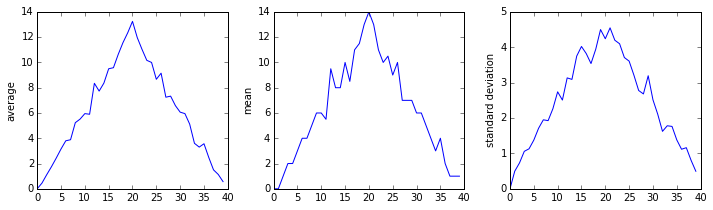

Suspicious looking maxima!
data/inflammation-02.csv


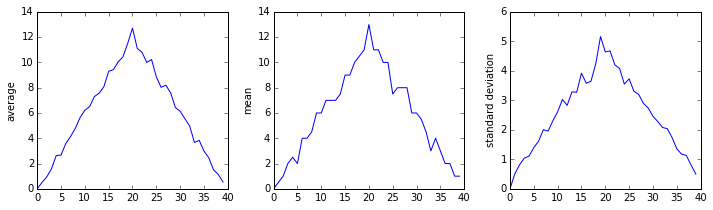

Suspicious looking maxima!
data/inflammation-03.csv


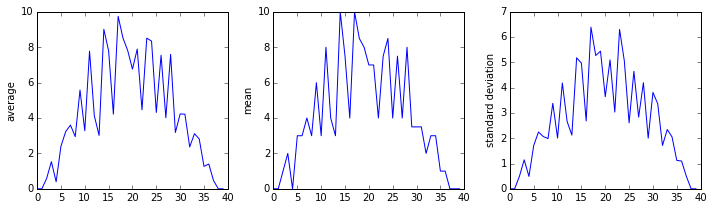

Minima add up to zero!


In [50]:
def analyze(filename):

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('mean')
    axes2.plot(np.median(data,axis=0))

    axes3.set_ylabel('standard deviation')
    axes3.plot(np.std(data,axis=0))

    fig.tight_layout()
    plt.show(fig)
    
filenames = glob.glob("data/inflammation*.csv")

for f in filenames[:3]:
    print f
    analyze(f)
    detect_problems(f)

#### Testing and documenting

Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to center a dataset around a particular value:



In [51]:
def center(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then center that around 3:

In [52]:
z = np.zeros((2,2))
print center(z, 3)

[[ 3.  3.]
 [ 3.  3.]]


That looks right, so let’s try ```center``` on our real data:

In [53]:
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print center(data, 0)

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


It’s hard to tell from the default output whether the result is correct, but there are a few simple tests that will reassure us:

In [54]:
print 'original min, mean, and max are:', data.min(), data.mean(), data.max()
centered = center(data, 0)
print 'min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max()

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and and max of centered data are: -6.14875 2.84217094304e-16 13.85125


That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the centered data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. We can even go further and check that the standard deviation hasn’t changed:

In [55]:
print 'std dev before and after:', data.std(), centered.std()

std dev before and after: 4.61383319712 4.61383319712


Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:

In [56]:
print 'difference in standard deviations before and after:', data.std() - centered.std()

difference in standard deviations before and after: 0.0


Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. We have one more task first, though: we should write some documentation for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add comments like this:

In [57]:
# center(data, desired): return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - data.mean()) + desired

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation:

In [58]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - data.mean()) + desired

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [59]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



A string like this is called a docstring. We don’t need to use triple quotes when we write one, but if we do, we can break the string across multiple lines:

In [60]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



<div class="alert alert-warning">It is worth repeating here:  DOCUMENT YOUR CODE.  Religiously.  People get lazy, and especially after you've spent all day writing and re-writing code for your analyses, it is tempting to skip the documentation. <b>Resist that urge, strongly</b>.  The first time you come back to a piece of code you wrote two months ago and have no idea what it does or why you wrote it, you will learn the value of documentation, and you will remember these words, and you will curse the day you forgot them.
</div>

#### Defaults

We have passed parameters to functions in two ways: directly, as in ```type(data)```, and by name, as in ```numpy.loadtxt(fname='something.csv', delimiter=',')```. In fact, we can pass the filename to ```loadtxt``` without the ```fname=```:

In [61]:
np.loadtxt('data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

but we still need to say ```delimiter=```:

In [62]:
np.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

To understand what’s going on, and make our own functions easier to use, let’s re-define our ```center``` function like this:

In [ ]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

The key change is that the second parameter is now written ```desired=0.0``` instead of just ```desired```. If we call the function with two arguments, it works as it did before:

In [ ]:
test_data = np.zeros((2, 2))
print center(test_data, 3)

But we can also now call it with just one parameter, in which case ```desired``` is automatically assigned the default value of 0.0:

In [ ]:
more_data = 5 + np.zeros((2, 2))
print 'data before centering:'
print more_data
print 'centered data:'
print center(more_data)

This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [ ]:
def display(a=1, b=2, c=3):
    print 'a:', a, 'b:', b, 'c:', c

print 'no parameters:'
display()
print 'one parameter:'
display(55)
print 'two parameters:'
display(55, 66)

As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [ ]:
print 'only setting the value of c'
display(c=77)

With that in hand, let’s look at the help for ```numpy.loadtxt```:

In [ ]:
help(np.loadtxt)

There’s a lot of information here, but the most important part is the first couple of lines:
    
    loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

This tells us that ```loadtxt``` has one parameter called ```fname``` that doesn’t have a default value, and eight others that do. If we call the function like this:

In [ ]:
np.loadtxt('data/inflammation-01.csv', ',')

then the filename is assigned to ```fname``` (which is what we want), but the delimiter string ',' is assigned to ```dtype``` rather than ```delimiter```, because ```dtype``` is the second parameter in the list. However ‘,’ isn’t a known ```dtype``` so our code produced an error message when we tried to run it. When we call ```loadtxt``` we don’t have to provide ```fname=``` for the filename because it’s the first item in the list, but if we want the ‘,’ to be assigned to the variable ```delimiter```, we do have to provide ```delimiter=``` for the second parameter since ```delimiter``` is not the second parameter in the list.

---

#### Exercise 3

"Adding" two strings produces their concatenation: ```'a'``` + ```'b'``` is ```'ab'```.  Write a function called ```fence``` that takes two parameters called ```original``` and ```wrapper``` and returns a new string that has the wrapper character at the beginning and the end of the original.  A call to your function should look like this:

    print fence('name','*')
    *name*
    
#### Exercise 4

Recall that if the variable ```s``` refers to a string, then ```s[0]``` is the string's first character and ```s[-1]``` is the last.  Write a function called ```outer``` that returns a string made up of just the first and last characters of its input.  A call to your function should look like this:

    print outer('helium')
    hm
    
#### Exercise 5

Write a ```rescale``` function that scales data to lie between 0.0 and 1.0.  A call to your function should look like this:

    print rescale(np.arange(5))
    array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])
    
    
#### Exercise 6

Rewrite ```rescale``` into a new function, ```rescale2```.  Scale the data to between 0.0 and 1.0 by default, but allow the user to specify upper and lower bounds if they want.  


----

In [64]:
#Exercise 3
def fence(original,wrapper):
    return wrapper+original+wrapper

print fence('name','*')

*name*


In [65]:
#Exercise 4
def outer(input):
    return input[0]+input[-1]

print outer('helium')

hm


In [68]:
#Exercise 5
def rescale(data):
    return data/float(data.max())

print rescale(np.arange(5))

[ 0.    0.25  0.5   0.75  1.  ]


In [81]:
#Exercise 6
def rescale2(data,upper=1,lower=0):
    return lower+(data-data.min())*(float(upper-lower)/(data.max()-data.min()))

print rescale2(np.arange(5),7,2)

[ 2.    3.25  4.5   5.75  7.  ]
